<a href="https://colab.research.google.com/github/Tasmine7/deep_fake_detection/blob/main/deep_fake_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tasminehnadaf","key":"fa1bea9c94b70011f99bb2e397b485d1"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!pip install kaggle

In [9]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
 99% 3.73G/3.75G [00:40<00:00, 75.4MB/s]
100% 3.75G/3.75G [00:40<00:00, 100MB/s] 


In [5]:
!unzip 140k-real-and-fake-faces.zip -d ./deepfake_data

Streaming output truncated to the last 5000 lines.
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: ./deepfake_data/real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: 

In [10]:
!ls ./deepfake_data

ls: cannot access './deepfake_data': No such file or directory


In [11]:
!ls ./deepfake_data/real_vs_fake

ls: cannot access './deepfake_data/real_vs_fake': No such file or directory


In [12]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces -p ./deepfake_data --unzip

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [00:49<00:00, 42.5MB/s]
100% 3.75G/3.75G [00:49<00:00, 81.2MB/s]


In [13]:
!ls ./deepfake_data/real_vs_fake/real-vs-fake



test  train  valid


In [14]:
!pip install efficientnet


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import efficientnet.tfkeras as efn
import matplotlib.pyplot as plt

In [30]:
train_dir = './deepfake_data/real_vs_fake/real-vs-fake/train'
val_dir = './deepfake_data/real_vs_fake/real-vs-fake/valid'
test_dir = './deepfake_data/real_vs_fake/real-vs-fake/test'

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [32]:
base_model = efn.EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

In [33]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)    │ (None, 7, 7, 1280)     │     4,049,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,661 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,564 (15.45 MB)

In [35]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [36]:
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stop]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7481 - loss: 0.5073

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 249s 74ms/step - accuracy: 0.7481 - loss: 0.5073 - val_accuracy: 0.8164 - val_loss: 0.4021
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 220s 70ms/step - accuracy: 0.8138 - loss: 0.4094 - val_accuracy: 0.8389 - val_loss: 0.3611
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 225s 72ms/step - accuracy: 0.8283 - loss: 0.3816 - val_accuracy: 0.8543 - val_loss: 0.3388
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 217s 69ms/step - accuracy: 0.8447 - loss: 0.3519 - val_accuracy: 0.8615 - val_loss: 0.3171
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.8531 - loss: 0.3344 - val_accuracy: 0.8691 - val_loss: 0.3012
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 215s 69ms/step - accuracy: 0.8609 - loss: 0.3194 - val_accuracy: 0.8737 - val_loss: 0.2943
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 225s 72ms/step - accuracy: 0.8672 - loss: 0.3067 - val_accuracy: 0.8811 - val_loss: 0.2802
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 220s 70ms/step - accuracy: 0.8716 - lo

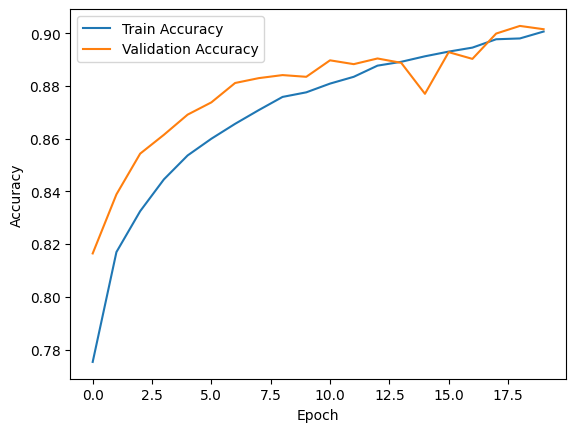

In [37]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
model.save('deepfake_efficientnet_model.keras')